# PART 0: Libraries & Settings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from haversine import haversine, Unit
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')

# PART 1: Load Data & Initial Checks

In [2]:
# Load raw dataset
df = pd.read_csv("../data/raw/amazon_delivery.csv")

In [3]:
# Show the dataset
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [4]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [5]:
# Display summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Agent_Age,43739.0,29.567137,5.815155,15.000000,25.000000,30.000000,35.000000,50.000000
Agent_Rating,43685.0,4.633780,0.334716,1.000000,4.500000,4.700000,4.900000,6.000000
Store_Latitude,43739.0,17.210960,7.764225,-30.902872,12.933298,18.551440,22.732225,30.914057
Store_Longitude,43739.0,70.661177,21.475005,-88.366217,73.170283,75.898497,78.045359,88.433452
Drop_Latitude,43739.0,17.459031,7.342950,0.010000,12.985996,18.633626,22.785049,31.054057
Drop_Longitude,43739.0,70.821842,21.153148,0.010000,73.280000,76.002574,78.104095,88.563452
Delivery_Time,43739.0,124.905645,51.915451,10.000000,90.000000,125.000000,160.000000,270.000000


In [6]:
# Shape
df.shape

(43739, 16)

Questions that come to mind:

- Can we fill in the missing data in Weather based on the average of similar data?
- If agent rating is related to delivery time, can we fill it in based on the average?
- Is the data from India? What should we do?
- 10 min and 270 min could be extreme values (we will evaluate this later in IQR analysis)

# PART 2: Cleaning Invalid & Missing Data

In [7]:
# Finding the values above Agent Rating 5
df[df['Agent_Rating'] > 5]

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
3438,nzsa056960624,50,6.0,-12.970324,-77.645748,13.010324,77.685748,2022-03-13,NaN,12:30:00,NaN,NaN,van,Urban,125,Cosmetics
4514,eids248121351,50,6.0,-17.451976,-78.385883,17.561976,78.495883,2022-04-04,NaN,23:20:00,NaN,NaN,bicycle,Metropolitian,135,Jewelry
4958,tznn437423907,50,6.0,-26.910262,-75.783013,27.020262,75.893013,2022-03-18,NaN,18:50:00,NaN,NaN,scooter,Metropolitian,100,Skincare
5142,dazy306268524,50,6.0,12.914264,77.678400,13.024264,77.788400,2022-04-06,NaN,20:55:00,NaN,NaN,van,Metropolitian,18,Grocery
5418,jzlx800086920,50,6.0,-27.159795,-78.042990,27.209795,78.092990,2022-02-13,NaN,18:05:00,NaN,NaN,scooter,Metropolitian,100,Electronics
6132,yiuy815061054,50,6.0,26.911927,75.797282,27.041927,75.927282,2022-04-02,NaN,22:10:00,NaN,NaN,van,Urban,100,Shoes
6741,tvsb800453924,50,6.0,-12.352058,-76.606650,12.372058,76.626650,2022-03-15,NaN,10:00:00,NaN,NaN,scooter,Metropolitian,70,Clothing
7364,nkcq202684713,50,6.0,0.000000,0.000000,0.010000,0.010000,2022-03-21,NaN,08:35:00,NaN,NaN,bicycle,Metropolitian,110,Books
9113,hkvr567845937,50,6.0,12.933298,77.614293,13.003298,77.684293,2022-03-12,NaN,18:25:00,NaN,NaN,scooter,Urban,85,Outdoors
9148,jysr585437673,50,6.0,-23.374989,-85.335486,23.444989,85.405486,2022-03-20,NaN,17:55:00,NaN,NaN,bicycle,Metropolitian,160,Home


Conclusion:
- When the agent rating is greater than 5, i.e., 6 according to the data:
- All Agent_Age values are 50 and `Order_Time`, `Weather`, `Traffic` = NaN
- In this case, it is most logical to completely remove the unreliable data and work with a clean dataset.

In [8]:
# Check the number of duplicates before removing
df.duplicated().sum()

0

In [9]:
# Remove invalid Agent_Rating (>5)
df = df[df['Agent_Rating'] <= 5]

In [10]:
# Check missing values
print("Remaining missing values:\n", df.isnull().sum())

Remaining missing values:
 Order_ID            0
Agent_Age           0
Agent_Rating        0
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            38
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64


- We deleted the rows with a score of 6 in Agent Rating, but what should we do about the missing values ​​in the weather variable?

In [11]:
# Displaying rows where the Weather variable is NaN
df[df['Weather'].isnull()]

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
2286,xige084493792,15,1.0,-26.891191,75.802083,26.981191,75.892083,2022-03-12,NaN,17:20:00,NaN,NaN,motorcycle,Urban,75,Home
2779,oilg311747812,15,1.0,22.750040,75.902847,22.810040,75.962847,2022-04-03,NaN,20:30:00,NaN,NaN,scooter,Metropolitian,145,Kitchen
2825,pbox816153129,15,1.0,21.149569,72.772697,21.209569,72.832697,2022-03-21,NaN,22:10:00,NaN,NaN,bicycle,Metropolitian,100,Clothing
5659,pjec796867569,15,1.0,13.026286,80.275235,13.056286,80.305235,2022-03-11,NaN,20:50:00,NaN,NaN,bicycle,Metropolitian,125,Electronics
8783,ebhx017527500,15,1.0,12.970324,77.645748,13.080324,77.755748,2022-03-25,NaN,23:25:00,NaN,NaN,motorcycle,Metropolitian,170,Snacks
10466,loqy430001953,15,1.0,19.181300,72.836191,19.231300,72.886191,2022-03-30,NaN,20:55:00,NaN,NaN,motorcycle,Metropolitian,195,Clothing
10687,wxzn327559387,15,1.0,-21.183434,-72.814492,21.193434,72.824492,2022-03-05,NaN,11:30:00,NaN,NaN,scooter,Urban,135,Jewelry
11610,dlmc121704817,15,1.0,22.751857,75.866699,22.801857,75.916699,2022-03-24,NaN,21:15:00,NaN,NaN,bicycle,Metropolitian,140,Skincare
14530,vnkn657645307,15,1.0,0.000000,0.000000,0.070000,0.070000,2022-03-16,NaN,23:55:00,NaN,NaN,bicycle,Metropolitian,105,Sports
15307,jbvk101196693,15,1.0,13.022394,80.242439,13.072394,80.292439,2022-03-11,NaN,18:10:00,NaN,NaN,bicycle,Metropolitian,85,Books


Conclusion:

Upon examining the 38 rows with missing values ​​in the Weather column, the following pattern was observed:
- In all of them, Agent_Age = 15 and Agent_Rating = 1.0, with missing Order_Time and Weather columns.
- Overall, it contains an artificial/irregular pattern.

Therefore, let's remove all of these records, assuming they are either erroneous or automatically generated by the system.

In [12]:
# Subtracting the remaining missing values
df = df.dropna()
print("Remaining missing values:\n", df.isnull().sum())

Remaining missing values:
 Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64


# PART 3: Categorical Variable Analysis

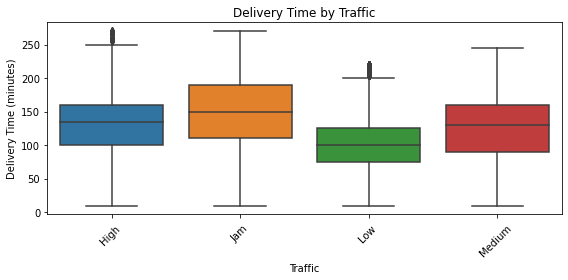

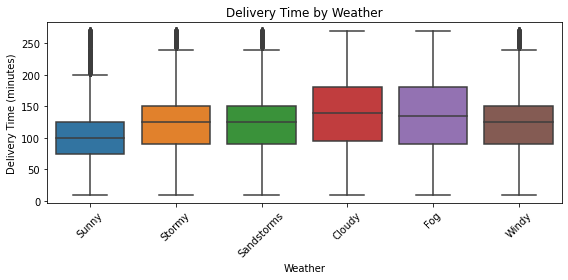

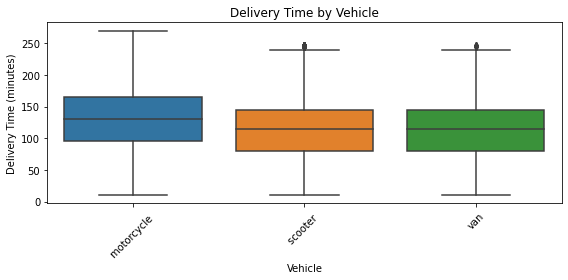

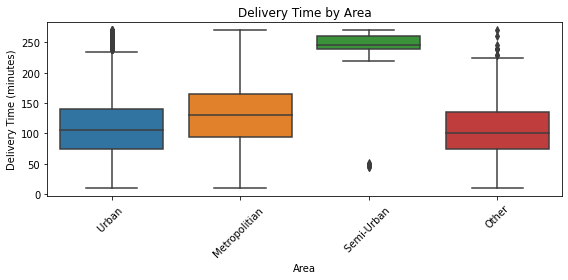

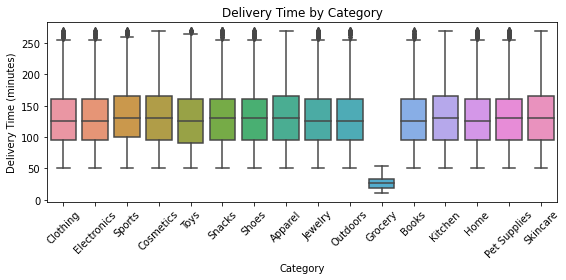

In [13]:
# The Effect of Categorical Variables on Delivery_Time

# These 5 graphs show the delivery time distribution according to 5 categorical variables.
categorical_vars = ['Traffic','Weather', 'Vehicle', 'Area', 'Category']

for var in categorical_vars:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x=var, y='Delivery_Time')
    plt.title(f"Delivery Time by {var}")
    plt.xlabel(var)
    plt.ylabel("Delivery Time (minutes)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Findings:
- As traffic levels increase, the median and distribution of delivery times increase significantly.
- Deliveries take longer and the variance is very high, especially in "Jam" conditions.
- This indicates that the Traffic variable has a strong influence on delivery time.
- In general, delivery times are longer in bad weather conditions such as "Windy" and "Fog".
- Since contrasting conditions such as "Sunny" and "Stormy" show similar distributions, other factors may also be influential.
- High variance → Weather conditions may be influential for the model, but not the sole determinant.
- "Motorcycle" appears to be the vehicle with the longest median delivery time.
- "Scooter" appears to have the shortest delivery time.
- "Van" may be preferred for short but high-volume deliveries.
- This difference suggests that vehicle type may be related to task type or traffic conditions.
- Delivery times are significantly higher and variance is low in "Semi-Urban" areas → these records may be limited. - Delivery times are shorter in "Urban" and "Other" areas.
- "Metropolitan" areas are slower on average, but factors like traffic may be influencing this.
- The average and variance of delivery times are quite low in the "Grocery" category.
- This suggests that this category may represent products requiring fast delivery or limited orders.
- In categories such as "Cosmetics", "Toys", and "Skincare", high upper limits and wide distributions are observed.

Conclusion:
- Although we can draw meaningful conclusions, there doesn't seem to be a striking difference (except for the very long delivery times in semi-urban areas, but the very low variance).

# PART 4: Time-based Features & Delivery Analysis

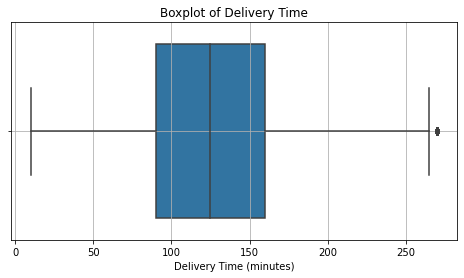

In [14]:
# Visual analysis of Delivery Time using boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Delivery_Time'])
plt.title("Boxplot of Delivery Time")
plt.xlabel("Delivery Time (minutes)")
plt.grid(True)
plt.show()

In [15]:
# Separate orders into 6 different time periods and add them as a new column.
# Define Order_Period
def map_time_period(hour):
    if 5 <= hour < 9:
        return 'Early Morning'
    elif 9 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 20:
        return 'Evening'
    elif 20 <= hour < 24:
        return 'Night'
    else:
        return 'Late Night'

df['Order_Hour'] = pd.to_datetime(df['Order_Time'], errors='coerce').dt.hour
df['Order_Period'] = df['Order_Hour'].apply(map_time_period)

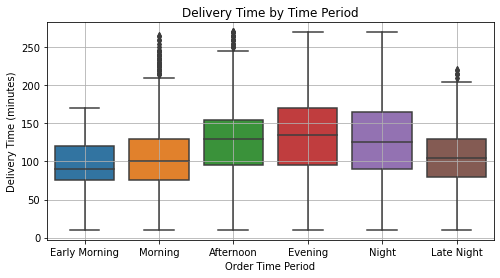

In [16]:
# Visual analysis of Delivery_Time using boxplot based on allocated periods
plt.figure(figsize=(8,4))
sns.boxplot(x='Order_Period', y='Delivery_Time', data=df, order=[
    'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night'
])
plt.title("Delivery Time by Time Period")
plt.xlabel("Order Time Period")
plt.ylabel("Delivery Time (minutes)")
plt.grid(True)
plt.show()

Findings:
- Average order times and variances are very high during Afternoon, Evening, and Night.
- The number of outliers is very high during Morning, Afternoon, and Late Night.
- Average order times are lower during Early Morning, Morning, and Late Night compared to others.

# PART 5: Outlier Detection & Removal

In [17]:
# Finding the lower and upper limits using the IQR method
Q1 = df['Delivery_Time'].quantile(0.25)
Q3 = df['Delivery_Time'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Lower Bound: -15.0
Upper Bound: 265.0


In [18]:
# Checking for outliers (how many are there?)
outliers = df[(df['Delivery_Time'] < lower_bound) | (df['Delivery_Time'] > upper_bound)]
print("Number of outliers:", outliers.shape[0])

Number of outliers: 79


In [19]:
# Separating data from outliers
df = df[(df['Delivery_Time'] >= lower_bound) & (df['Delivery_Time'] <= upper_bound)]
print(f"Data shape after outlier removal: {df.shape}")

Data shape after outlier removal: (43515, 18)


# PART 6: Feature Engineering (Distance)

In [20]:
# Calculating the Distance Between Store and Drop Locations
# We can calculate the real-world distance from these four coordinates.
# The 'Distance' column is added in kilometers using the Haversine formula.
# This can be one of the most important variables affecting Delivery_Time.

def calculate_distance(row):
    store_location = (row['Store_Latitude'], row['Store_Longitude'])
    drop_location = (row['Drop_Latitude'], row['Drop_Longitude'])
    return haversine(store_location, drop_location, unit=Unit.KILOMETERS)

df['Distance_km'] = df.apply(calculate_distance, axis=1)

df[['Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Distance_km']].head()

,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Distance_km
0,22.745049,75.892471,22.765049,75.912471,3.025153
1,12.913041,77.683237,13.043041,77.813237,20.183558
2,12.914264,77.678400,12.924264,77.688400,1.552760
3,11.003669,76.976494,11.053669,77.026494,7.790412
4,12.972793,80.249982,13.012793,80.289982,6.210147


# PART 7: Continuous Variable Analysis

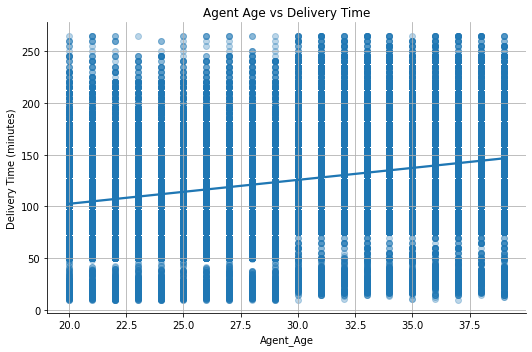

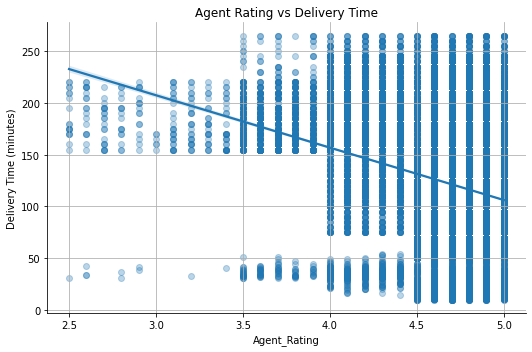

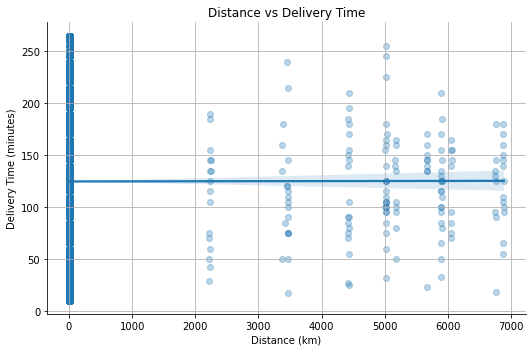

In [21]:
# Analysis of the relationship between continuous variables and delivery time
# 3.1 Scatter Plot + Regression Line (lmplot) – for 3 different variables
def draw_lmplot(x, y='Delivery_Time', data=None, title='', xlabel='', ylabel='Delivery Time (minutes)'):
    sns.lmplot(x=x, y=y, data=data, aspect=1.5, height=5, scatter_kws={'alpha': 0.3})
    plt.title(title)
    plt.xlabel(xlabel or x)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
draw_lmplot(x='Agent_Age', data=df, title="Agent Age vs Delivery Time")
draw_lmplot(x='Agent_Rating', data=df, title="Agent Rating vs Delivery Time")
draw_lmplot(x='Distance_km', data=df, title="Distance vs Delivery Time", xlabel="Distance (km)")

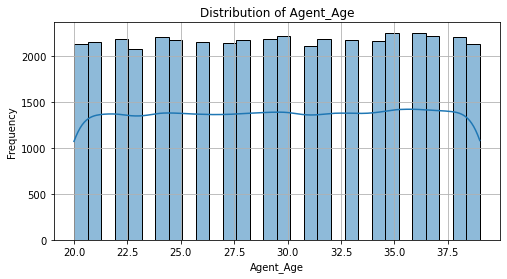

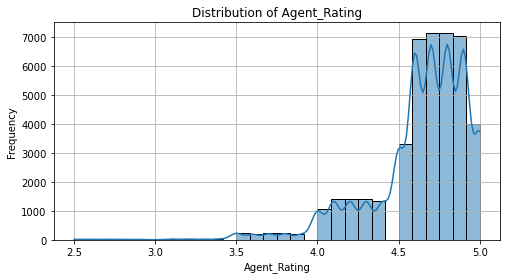

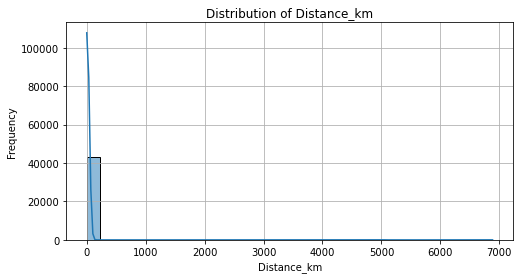

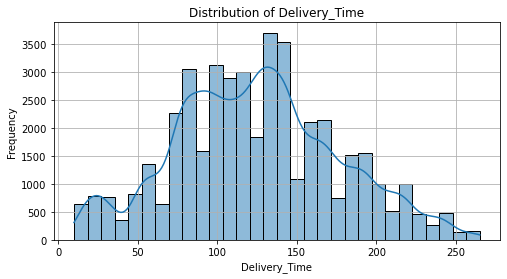

In [22]:
# Histogram of Continuous Variables
numerical_vars = ['Agent_Age', 'Agent_Rating', 'Distance_km', 'Delivery_Time']

for col in numerical_vars:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

- The Agent_Age variable is evenly distributed in the 20-39 age range → this could be simulation data.
- Agent_Rating is largely clustered in the 4.5-5.0 range → low variance, may have a limited impact on the model.
- Distance_km is heavily skewed to the right → values above 1000 km may be outliers, log transformation could be considered.
- Delivery_Time is skewed to the right but has an acceptable distribution → log transformation is optional.

- The current Delivery_Time distribution is quite sufficient, especially for tree-based models (RandomForest, XGBoost).
- However, if you are going to try Linear Regression, log transformation can be tested additionally. I shouldn't do log transformation for now.
- If the error distribution turns out to be bad after Linear Regression (e.g., MAE is very large), you can consider it later.

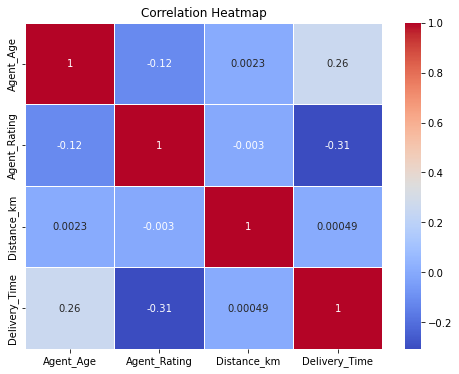

In [23]:
# Correlation Matrix + Heatmap
# We only select continuous variables
correlation_matrix = df[numerical_vars].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Findings (Correlation and Scatterplot):

- Correlation between Agent_Age and Delivery_Time is ≈ +0.26: A positive but weak relationship.
- Comment: Delivery times may slightly increase with age. They may be experienced but slow.


- Correlation between Agent_Rating and Delivery_Time is ≈ -0.31: Negative and more significant than the others.
- Comment: Couriers with higher ratings generally seem to deliver faster.


- Correlation between Distance_km and Delivery_Time is ≈ 0.0005: Almost no relationship.
- Comment: With this data, delivery time doesn't seem to change as distance increases. Perhaps the effect isn't observable because the distance is too small, or the GPS coordinates might be incorrect.

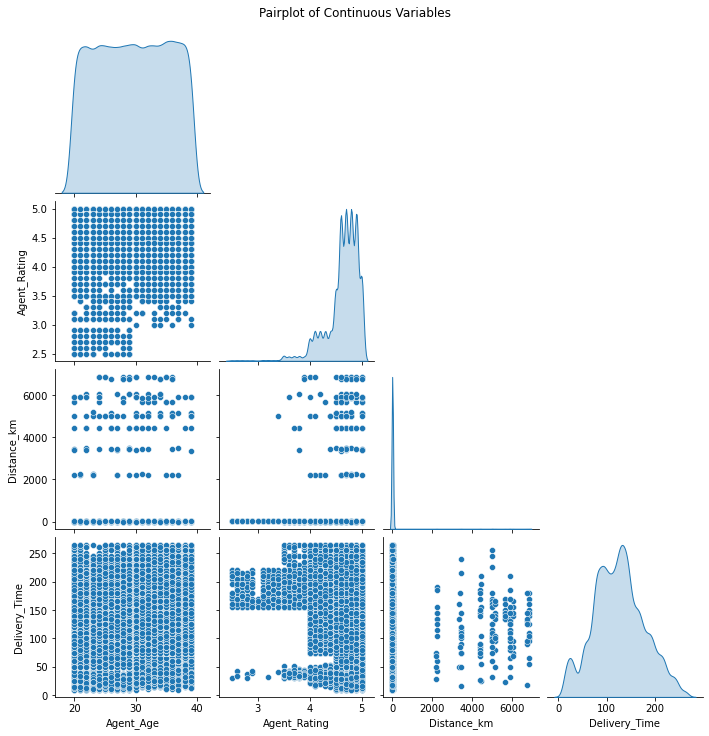

In [24]:
# A subset of continuous variables
# Pairplot
sns.pairplot(df[numerical_vars], diag_kind="kde", corner=True)
plt.suptitle("Pairplot of Continuous Variables", y=1.02)
plt.show()

# PART 8: Temporal Analysis (Monthly / Weekly / Daily)

In [25]:
# If the Order_Date column exists, it is converted to datetime format.
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

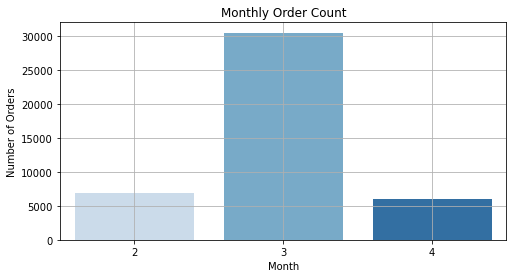

In [26]:
# To see which months have the highest order volume
df['Order_Month'] = df['Order_Date'].dt.month

plt.figure(figsize=(8, 4))
sns.countplot(x='Order_Month', data=df, palette='Blues')
plt.title("Monthly Order Count")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.show()

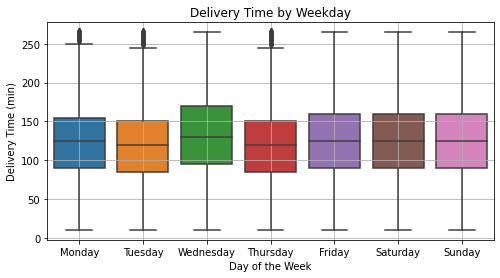

In [27]:
# Average delivery time by weekday
df['Weekday'] = df['Order_Date'].dt.day_name()

plt.figure(figsize=(8, 4))
sns.boxplot(x='Weekday', y='Delivery_Time', data=df, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.title("Delivery Time by Weekday")
plt.xlabel("Day of the Week")
plt.ylabel("Delivery Time (min)")
plt.grid(True)
plt.show()

- The number of orders in March was ≈ 30,000, while in February and April it was ≈ 6,000. This may indicate a time imbalance in the dataset or seasonal demand in the real world. The weighting of March should be considered in the analysis or modeling process.

- The day of the week does not significantly affect delivery time. In other words, there is no pattern like "Monday is delayed" or "Saturday arrives early" in this data. The effect of the "day" variable on modeling may be limited.

- Let's see if there are differences by week.

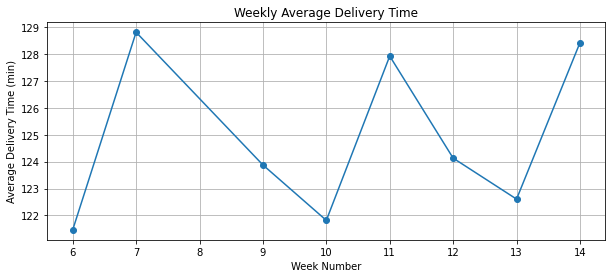

In [28]:
# ISO week number
df['Order_Week'] = df['Order_Date'].dt.isocalendar().week

# Average weekly delivery time is calculated.
weekly_avg = df.groupby('Order_Week')['Delivery_Time'].mean()

plt.figure(figsize=(10, 4))
weekly_avg.plot(marker='o')
plt.title("Weekly Average Delivery Time")
plt.xlabel("Week Number")
plt.ylabel("Average Delivery Time (min)")
plt.grid(True)
plt.show()

- Average weekly delivery times were examined.
- Data was only available for weeks 6–14.
- This is the reason why the number of orders in March appears high.
- Caution should be exercised when making comparisons as data for other months is missing.

How does delivery time change when order time (morning, evening, etc.) and traffic density are considered together?

# PART 9: Interaction Effects (Order Time & Traffic)

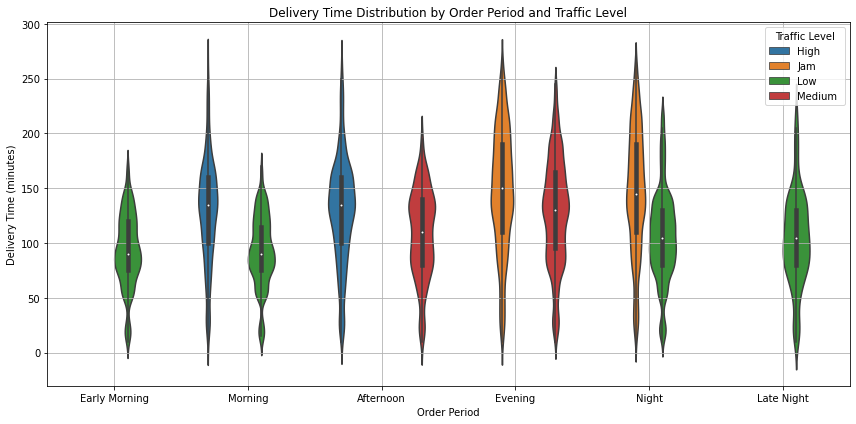

In [29]:
# Interactive Violinplot (Order_Period + Traffic)
plt.figure(figsize=(12, 6))
sns.violinplot(x='Order_Period', y='Delivery_Time', hue='Traffic', data=df,
               order=['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night'])
plt.title("Delivery Time Distribution by Order Period and Traffic Level")
plt.xlabel("Order Period")
plt.ylabel("Delivery Time (minutes)")
plt.legend(title='Traffic Level', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

- The interaction between traffic level and order period was analyzed.
- Delivery times are significantly longer in "Jam" and "High" traffic situations.
- Variance increases especially during evening and night hours → the system may be under strain.
- Traffic level in the "Afternoon" period makes a dramatic difference to delivery time.
- "Late Night" hours are generally associated with "Low" traffic → delivery is faster and more stable.

So why aren't there violin plots for all colors, i.e., all Traffic Levels, in each Order Period?

In [30]:
df.groupby(['Order_Period', 'Traffic']).size().unstack(fill_value=0)

Traffic,High,Jam,Low,Medium
Order_Period,,,,
Afternoon,2531,0,0,785
Early Morning,0,0,1807,0
Evening,0,4128,0,9829
Late Night,0,0,429,0
Morning,1758,0,4102,0
Night,0,9508,8638,0


Note: Some Order_Period segments lack specific Traffic levels, therefore a violin plot has not been drawn for those combinations (e.g., Late Night + Jam).

# PART 10: Save Cleaned Dataset

In [31]:
import pathlib
output_path = pathlib.Path("../data/processed/delivery_cleaned.csv")
output_path.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to {output_path}")

Cleaned dataset saved to ..\data\processed\delivery_cleaned.csv
